In [1]:
import matplotlib.pyplot as plt

In [2]:
Splinestep0 = 1000000
Q_spline0 = 133.61441120096785

In [3]:
Splinestep1 = 100000
Q_spline1 = 133.61442847497878

In [4]:
Splinestep2 = 10000
Q_spline2 = 133.61388186888826

In [5]:
Splinestep3 = 1000
Q_spline3 = 133.59062701636194

In [6]:
Splinestep4 = 100
Q_spline4 = 132.22867622313566

In [7]:
x = [Splinestep0, Splinestep1, Splinestep2, Splinestep3, Splinestep4]
y = [Q_spline0, Q_spline1, Q_spline2, Q_spline3, Q_spline4]

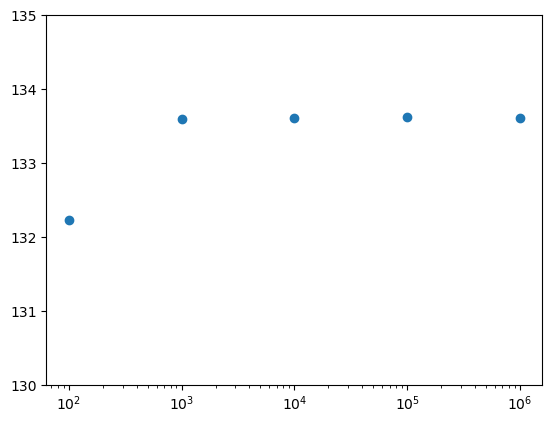

In [9]:
plt.ylim(130, 135)
plt.xscale('log')
plt.scatter(x, y)

ValueError: 'orange*-' is not a valid format string (unrecognized character 'a')

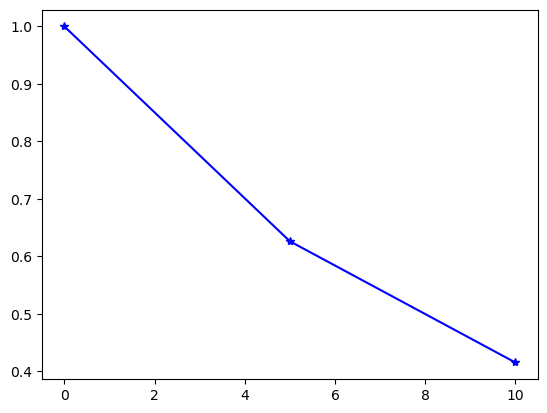

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Определим параметры системы
gamma = 0.1  # Потери для моды
K = 0.05     # Коэффициент связи между модами

# Определим систему дифференциальных уравнений
def dA_dt(A, t):
    dA1 = -gamma * A[0] + K * A[1]  # Уравнение для первой моды
    dA2 = -gamma * A[1] + K * A[0]  # Уравнение для второй моды
    return np.array([dA1, dA2])

# Реализация метода Рунге-Кутта 4-го порядка
def runge_kutta_4(A0, t):
    A = A0
    dt = t[1] - t[0]
    A_values = [A0]

    for i in range(1, len(t)):
        k1 = dA_dt(A, t[i-1])
        k2 = dA_dt(A + 0.5 * dt * k1, t[i-1] + 0.5 * dt)
        k3 = dA_dt(A + 0.5 * dt * k2, t[i-1] + 0.5 * dt)
        k4 = dA_dt(A + dt * k3, t[i-1] + dt)
        A = A + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        A_values.append(A)

    return np.array(A_values)

# Начальные условия и временной интервал
A0 = np.array([1.0, 0.0])  # Начальные амплитуды мод
t = np.linspace(0, 10, 3)  # Временной интервал от 0 до 10 секунд

# Решение системы уравнений
A_values = runge_kutta_4(A0, t)

# Визуализация результатов
#plt.plot(t, A_values[:, 0], label='Мода 1', 'b*-')
#plt.plot(t, A_values[:, 1], label='Мода 2', 'b*-')
plt.plot(t, A_values[:, 0], 'b*-')
plt.plot(t, A_values[:, 1], 'e*-')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.title('Динамика связанных мод')
plt.legend()
plt.grid()
plt.show()